In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## origin data->original data(업종명을 바꿔준다)

In [17]:
df_1112=pd.read_csv('./Origin/Origin_1112.csv')
df_1213=pd.read_csv("./Origin/Origin_1213.csv")
df_1314=pd.read_csv("./Origin/Origin_1314.csv")
df_1415=pd.read_csv("./Origin/Origin_1415.csv")
df_1516=pd.read_csv("./Origin/Origin_1516.csv")
df_1617=pd.read_csv("./Origin/Origin_1617.csv")
df_1718=pd.read_csv("./Origin/Origin_1718.csv")

In [18]:
## 업종명을 소분류에서 대분류로 바꿔주는 함수

def transform(df):
    
    
    df['업종명'] = df['업종명'].map({
        '건설업': '건설업',
        '기타금융' : '금융 및 보험업',
        '증권': '금융 및 보험업',
        '보험' : '금융 및 보험업',
        '은행' : '금융 및 보험업',
        '서비스업' : '서비스업',
        '유통업' : '운수 및 창고업',
        '운수창고업' : '운수 및 창고업',
        '전기가스업' : '에너지업',
        '통신업' : '정보통신업',
        '섬유의복' : '제조업',
        '음식료품' : '제조업',
        '기타제조업' : '제조업',
        '종이목재' : '제조업',
        '철강금속' : '제조업',
        '기계' : '제조업',
        '운수장비' : '제조업',
        '화학' : '제조업',
        '전기전자' : '제조업',
        '비금속광물' : '제조업',
        '의료정밀' : '제조업',
        '농업, 임업 및 어업' : '1차 산업',
        '광업' : '1차 산업',
        '의약품' : '의약품'
    })
    df = df.set_index(['업종명', '종목명']).sort_index()

    return df

transform 함수 실행

In [19]:
df_1112=transform(df_1112)
df_1213=transform(df_1213)
df_1314=transform(df_1314)
df_1415=transform(df_1415)
df_1516=transform(df_1516)
df_1617=transform(df_1617)
df_1718=transform(df_1718)


실행된 함수 csv파일로 저장

In [20]:
# df_1112.to_csv('original_1112.csv')
# df_1213.to_csv('original_1213.csv')
# df_1314.to_csv('original_1314.csv')
# df_1415.to_csv('original_1415.csv')
# df_1516.to_csv('original_1516.csv')
# df_1617.to_csv('original_1617.csv')
# df_1718.to_csv('original_1718.csv')

## 윈드라이징 

#### 11,12년

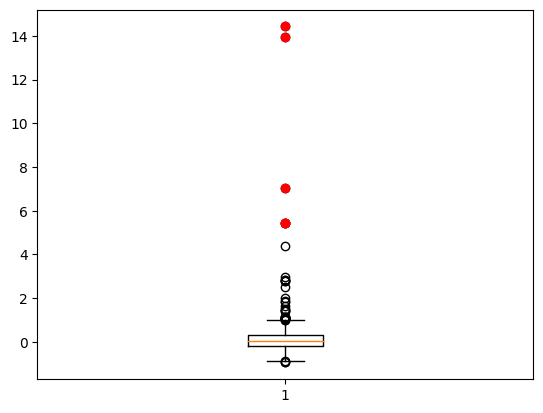

이상치 데이터: [5.460176991150442, 14.43010752688172, 7.062130177514793, 5.4189723320158105, 13.950980392156865]


,업종명,종목명,2011_E,2011_S,2011_G,2012_E,2012_S,2012_G,Diff_E,Diff_S,Diff_G,2011_종가,2012_종가,등락률,연도
0,1차 산업,동원,2.0,2.0,2.0,2.0,2.5,2.5,0.0,0.5,0.5,5350,4825,-0.098131,"11,12년"
1,1차 산업,동원산업,2.0,2.5,2.0,3.0,2.5,2.5,1.0,0.0,0.5,166000,285000,0.716867,"11,12년"
2,1차 산업,동원수산,2.0,2.0,2.0,3.0,2.5,2.5,1.0,0.5,0.5,22700,14000,-0.383260,"11,12년"
3,1차 산업,사조산업,3.0,2.5,2.0,2.0,2.5,2.5,-1.0,0.0,0.5,54000,56300,0.042593,"11,12년"
4,1차 산업,사조오양,3.0,2.0,2.0,3.0,2.5,2.5,0.0,0.5,0.5,16600,13700,-0.174699,"11,12년"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,제조업,황금에스티,3.0,2.5,2.0,3.0,2.5,2.5,0.0,0.0,0.5,4700,3815,-0.188298,"11,12년"
489,제조업,효성,4.0,2.5,4.0,4.0,2.5,4.0,0.0,0.0,0.0,64900,60100,-0.073960,"11,12년"
490,제조업,후성,2.0,2.5,2.5,3.0,2.5,2.5,1.0,0.0,0.0,8130,5120,-0.370234,"11,12년"
491,제조업,휴스틸,3.0,2.0,2.5,3.0,2.5,4.0,0.0,0.5,1.5,19900,27400,0.376884,"11,12년"


In [31]:
original_1112 = pd.read_csv('./original_data/original_1112.csv')

# 데이터 예시
data = original_1112['등락률']

# 이상치 임계값 설정 (98%)
threshold = np.percentile(data, 99)

# 박스 플롯 그리기
plt.boxplot(data)

# 이상치 표시
outliers = [val for val in data if (val > threshold) |(val <-threshold)]
for outlier in outliers:
    plt.plot(1, outlier, 'ro')  # 이상치를 빨간색으로 표시

# 그래프 보여주기
plt.show()

outliers = [val for val in data if (val > threshold)|(val <-threshold)]
print("이상치 데이터:", outliers)
len(outliers)

# 이상치 제외한 값을 원본에 저장
original_1112 = original_1112[~original_1112['등락률'].isin(outliers)]
original_1112   

#original_1112.to_csv('./Winsorization/99% 이상치제거_original_1112.csv')

#### 12,13년

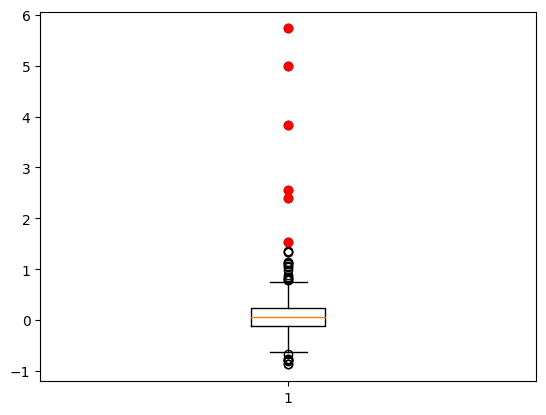

이상치 데이터: [3.827586206896552, 1.534775888717156, 2.5604770017035774, 2.404255319148936, 4.989304812834225, 5.730769230769231]


,업종명,종목명,2012_E,2012_S,2012_G,2013_E,2013_S,2013_G,Diff_E,Diff_S,Diff_G,2012_종가,2013_종가,등락률,연도
0,1차 산업,동원,2.0,2.5,2.5,3.0,2.5,2.5,1.0,0.0,0.0,4825,4310,-0.106736,"12,13년"
1,1차 산업,동원산업,3.0,2.5,2.5,3.0,2.5,2.5,0.0,0.0,0.0,285000,284000,-0.003509,"12,13년"
2,1차 산업,동원수산,3.0,2.5,2.5,2.0,2.5,2.5,-1.0,0.0,0.0,14000,14900,0.064286,"12,13년"
3,1차 산업,사조산업,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,56300,29550,-0.475133,"12,13년"
4,1차 산업,사조오양,3.0,2.5,2.5,3.0,2.5,2.5,0.0,0.0,0.0,13700,7450,-0.456204,"12,13년"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,제조업,황금에스티,3.0,2.5,2.5,3.0,2.5,2.5,0.0,0.0,0.0,3815,3925,0.028834,"12,13년"
529,제조업,효성,4.0,2.5,4.0,4.0,4.0,4.0,0.0,1.5,0.0,60100,71600,0.191348,"12,13년"
530,제조업,후성,3.0,2.5,2.5,2.0,2.5,2.5,-1.0,0.0,0.0,5120,4010,-0.216797,"12,13년"
531,제조업,휴스틸,3.0,2.5,4.0,3.0,2.5,2.5,0.0,0.0,-1.5,27400,19400,-0.291971,"12,13년"


In [22]:
original_1213 = pd.read_csv('./original_data/original_1213.csv')

# 데이터 예시
data = original_1213['등락률']

# 이상치 임계값 설정 (98%)
threshold = np.percentile(data, 99)

# 박스 플롯 그리기
plt.boxplot(data)

# 이상치 표시
outliers = [val for val in data if (val > threshold) |(val <-threshold)]
for outlier in outliers:
    plt.plot(1, outlier, 'ro')  # 이상치를 빨간색으로 표시

# 그래프 보여주기
plt.show()

outliers = [val for val in data if (val > threshold)|(val <-threshold)]
print("이상치 데이터:", outliers)
len(outliers)

# 이상치 제외한 값을 원본에 저장
original_1213 = original_1213[~original_1213['등락률'].isin(outliers)]
original_1213

#original_1213.to_csv('./Winsorization/99% 이상치제거_original_1213.csv')


#### 13,14년

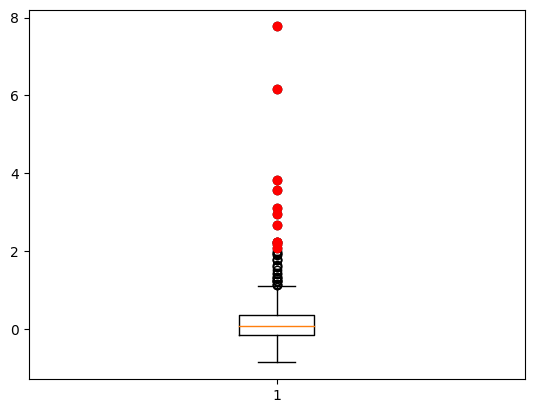

이상치 데이터: [3.5689655172413794, 7.770053475935829, 2.08641975308642, 3.840579710144928, 6.165109034267913, 3.1232876712328768, 2.230414746543779, 2.9714285714285715, 2.186046511627907, 2.232682060390764, 2.679245283018868]


,업종명,종목명,2013_E,2013_S,2013_G,2014_E,2014_S,2014_G,Diff_E,Diff_S,Diff_G,2013_종가,2014_종가,등락률,연도
0,1차 산업,동원,3.0,2.5,2.5,2.0,2.5,2.5,-1.0,0.0,0.0,4310,3550,-0.176334,"13,14년"
1,1차 산업,동원산업,3.0,2.5,2.5,3.0,2.5,2.5,0.0,0.0,0.0,284000,328000,0.154930,"13,14년"
2,1차 산업,동원수산,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,14900,7180,-0.518121,"13,14년"
3,1차 산업,사조산업,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,29550,37550,0.270728,"13,14년"
4,1차 산업,사조오양,3.0,2.5,2.5,2.0,2.5,2.5,-1.0,0.0,0.0,7450,8900,0.194631,"13,14년"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,제조업,황금에스티,3.0,2.5,2.5,3.0,2.5,2.5,0.0,0.0,0.0,3925,5120,0.304459,"13,14년"
542,제조업,효성,4.0,4.0,4.0,3.0,4.0,2.5,-1.0,0.0,-1.5,71600,63500,-0.113128,"13,14년"
543,제조업,후성,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,4010,2495,-0.377805,"13,14년"
544,제조업,휴스틸,3.0,2.5,2.5,3.0,2.5,4.0,0.0,0.0,1.5,19400,16650,-0.141753,"13,14년"


In [23]:
original_1314 = pd.read_csv('./original_data/original_1314.csv')

# 데이터 예시
data = original_1314['등락률']

# 이상치 임계값 설정 (예: 상위 95%)
threshold = np.percentile(data, 98)

# 박스 플롯 그리기
plt.boxplot(data)

# 이상치 표시
outliers = [val for val in data if (val > threshold) |(val <-threshold)]
for outlier in outliers:
    plt.plot(1, outlier, 'ro')  # 이상치를 빨간색으로 표시

# 그래프 보여주기
plt.show()

outliers = [val for val in data if (val > threshold)|(val <-threshold)]
print("이상치 데이터:", outliers)
len(outliers)


original_1314 = original_1314[~original_1314['등락률'].isin(outliers)]
original_1314

#original_1314.to_csv('./Winsorization/99% 이상치제거_original_1314.csv')

#### 14,15년

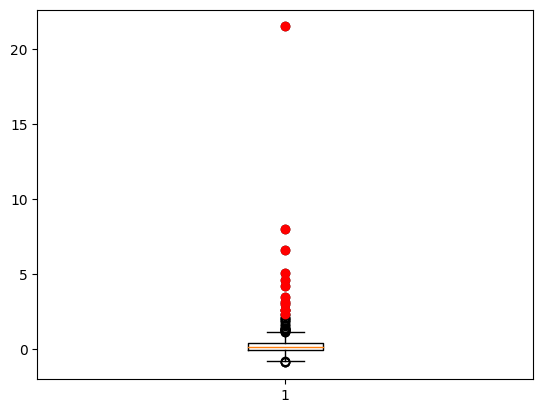

이상치 데이터: [2.582463465553236, 2.5976331360946747, 8.006849315068493, 6.561643835616438, 3.4425385934819897, 21.5, 5.08235294117647, 4.591666666666667, 3.105058365758755, 2.968152866242038, 4.166666666666667, 2.305978898007034]


,업종명,종목명,2014_E,2014_S,2014_G,2015_E,2015_S,2015_G,Diff_E,Diff_S,Diff_G,2014_종가,2015_종가,등락률,연도
0,1차 산업,동원,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,3550,5390,0.518310,"14,15년"
1,1차 산업,동원산업,3.0,2.5,2.5,3.0,4.0,2.5,0.0,1.5,0.0,328000,320000,-0.024390,"14,15년"
2,1차 산업,동원수산,2.0,2.5,2.5,3.0,2.5,2.5,1.0,0.0,0.0,7180,9900,0.378830,"14,15년"
3,1차 산업,사조산업,2.0,2.5,2.5,3.0,2.5,2.5,1.0,0.0,0.0,37550,68500,0.824234,"14,15년"
4,1차 산업,사조오양,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,8900,12350,0.387640,"14,15년"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,제조업,효성,3.0,4.0,2.5,2.0,4.0,4.0,-1.0,0.0,1.5,63500,117000,0.842520,"14,15년"
565,제조업,후성,2.0,2.5,2.5,2.0,2.5,4.0,0.0,0.0,1.5,2495,4175,0.673347,"14,15년"
566,제조업,휴비스,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,12300,8490,-0.309756,"14,15년"
567,제조업,휴스틸,3.0,2.5,4.0,3.0,2.5,4.0,0.0,0.0,0.0,16650,17900,0.075075,"14,15년"


In [24]:
original_1415 = pd.read_csv('./original_data/original_1415.csv')

# 데이터 예시
data = original_1415['등락률']

# 이상치 임계값 설정 (예: 상위 95%)
threshold = np.percentile(data, 98)

# 박스 플롯 그리기
plt.boxplot(data)

# 이상치 표시
outliers = [val for val in data if (val > threshold) |(val <-threshold)]
for outlier in outliers:
    plt.plot(1, outlier, 'ro')  # 이상치를 빨간색으로 표시

# 그래프 보여주기
plt.show()

outliers = [val for val in data if (val > threshold)|(val <-threshold)]
print("이상치 데이터:", outliers)
len(outliers)


original_1415 = original_1415[~original_1415['등락률'].isin(outliers)]
original_1415

#original_1415.to_csv('./Winsorization/99% 이상치제거_original_1415.csv')

#### 15,16년

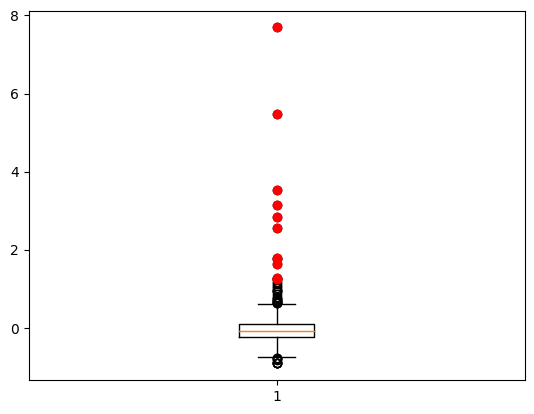

이상치 데이터: [7.692022263450835, 3.1379310344827585, 2.837719298245614, 1.763157894736842, 1.794392523364486, 5.480865224625624, 1.2939068100358424, 3.5430809399477807, 1.639240506329114, 1.261904761904762, 2.567741935483871, 1.2614840989399294]


,업종명,종목명,2015_E,2015_S,2015_G,2016_E,2016_S,2016_G,Diff_E,Diff_S,Diff_G,2015_종가,2016_종가,등락률,연도
1,1차 산업,동원산업,3.0,4.0,2.5,3.0,2.5,2.5,0.0,-1.5,0.0,320000,308000,-0.037500,"15,16년"
2,1차 산업,동원수산,3.0,2.5,2.5,3.0,2.5,2.5,0.0,0.0,0.0,9900,8490,-0.142424,"15,16년"
3,1차 산업,사조산업,3.0,2.5,2.5,2.0,2.5,2.5,-1.0,0.0,0.0,68500,62500,-0.087591,"15,16년"
4,1차 산업,사조오양,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,12350,11250,-0.089069,"15,16년"
5,1차 산업,신라교역,2.0,2.5,2.5,3.0,2.5,2.5,1.0,0.0,0.0,17350,14050,-0.190202,"15,16년"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,제조업,효성,2.0,4.0,4.0,1.0,4.0,5.0,-1.0,0.0,1.0,117000,134000,0.145299,"15,16년"
590,제조업,후성,2.0,2.5,4.0,3.0,2.5,4.0,1.0,0.0,0.0,4175,7770,0.861078,"15,16년"
591,제조업,휴비스,2.0,2.5,2.5,3.0,4.0,4.0,1.0,1.5,1.5,8490,7170,-0.155477,"15,16년"
592,제조업,휴스틸,3.0,2.5,4.0,3.0,2.5,4.0,0.0,0.0,0.0,17900,14600,-0.184358,"15,16년"


In [25]:
original_1516 = pd.read_csv('./original_data/original_1516.csv')

# 데이터 예시
data = original_1516['등락률']

# 이상치 임계값 설정 (예: 상위 95%)
threshold = np.percentile(data, 98)

# 박스 플롯 그리기
plt.boxplot(data)

# 이상치 표시
outliers = [val for val in data if (val > threshold) |(val <-threshold)]
for outlier in outliers:
    plt.plot(1, outlier, 'ro')  # 이상치를 빨간색으로 표시

# 그래프 보여주기
plt.show()

outliers = [val for val in data if (val > threshold)|(val <-threshold)]
print("이상치 데이터:", outliers)
len(outliers)


original_1516 = original_1516[~original_1516['등락률'].isin(outliers)]
original_1516

#original_1516.to_csv('./Winsorization/99% 이상치제거_original_1516.csv')

## 16,17년

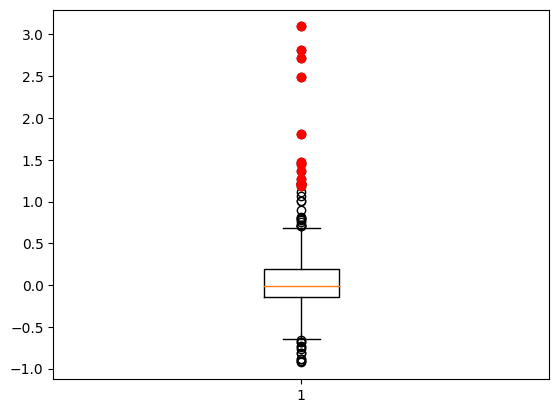

이상치 데이터: [1.453416149068323, 2.8157894736842106, 1.205128205128205, 3.095982142857143, 2.71875, 1.1845174973488866, 1.208067940552017, 1.2706964520367936, 1.474554707379135, 1.2235722964763065, 1.3638132295719845, 1.8143021914648207, 2.488773747841105]


,업종명,종목명,2016_E,2016_S,2016_G,2017_E,2017_S,2017_G,Diff_E,Diff_S,Diff_G,2016_종가,2017_종가,등락률,연도
0,1차 산업,동원,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,46850,4085,-0.912807,"16,17년"
1,1차 산업,동원산업,3.0,2.5,2.5,3.0,5.0,2.5,0.0,2.5,0.0,308000,285500,-0.073052,"16,17년"
2,1차 산업,동원수산,3.0,2.5,2.5,3.0,2.5,2.5,0.0,0.0,0.0,8490,8920,0.050648,"16,17년"
3,1차 산업,사조산업,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,62500,73100,0.169600,"16,17년"
4,1차 산업,사조오양,2.0,2.5,2.5,3.0,2.5,2.5,1.0,0.0,0.0,11250,14650,0.302222,"16,17년"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,제조업,효성,1.0,4.0,5.0,1.0,5.0,4.0,0.0,1.0,-1.0,134000,134500,0.003731,"16,17년"
613,제조업,후성,3.0,2.5,4.0,2.0,2.5,4.0,-1.0,0.0,0.0,7770,8930,0.149292,"16,17년"
614,제조업,휴비스,3.0,4.0,4.0,3.0,5.0,4.0,0.0,1.0,0.0,7170,7800,0.087866,"16,17년"
615,제조업,휴스틸,3.0,2.5,4.0,3.0,2.5,2.5,0.0,0.0,-1.5,14600,14600,0.000000,"16,17년"


In [26]:
original_1617 = pd.read_csv('./original_data/original_1617.csv')

# 데이터 예시
data = original_1617['등락률']

# 이상치 임계값 설정 (예: 상위 95%)
threshold = np.percentile(data, 98)

# 박스 플롯 그리기
plt.boxplot(data)

# 이상치 표시
outliers = [val for val in data if (val > threshold) |(val <-threshold)]
for outlier in outliers:
    plt.plot(1, outlier, 'ro')  # 이상치를 빨간색으로 표시

# 그래프 보여주기
plt.show()

outliers = [val for val in data if (val > threshold)|(val <-threshold)]
print("이상치 데이터:", outliers)
len(outliers)


original_1617 = original_1617[~original_1617['등락률'].isin(outliers)]
original_1617

#original_1617.to_csv('./Winsorization/99% 이상치제거_original_1617.csv')

## 17,18년

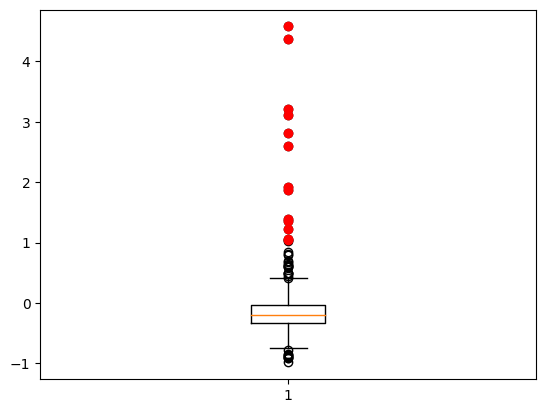

이상치 데이터: [1.044776119402985, 4.576519916142558, 1.3867313915857604, 4.376623376623376, 1.9266666666666667, 1.869047619047619, 2.6047197640117994, 3.106060606060606, 1.217659137577002, 3.214992927864215, 1.3512252042007, 1.0667678300455234, 2.81692573402418]


,업종명,종목명,2017_E,2017_S,2017_G,2018_E,2018_S,2018_G,Diff_E,Diff_S,Diff_G,2017_종가,2018_종가,등락률,연도
0,1차 산업,동원산업,3.0,5.0,2.5,2.0,2.5,2.5,-1.0,-2.5,0.0,285500,241500,-0.154116,"17,18년"
1,1차 산업,동원수산,3.0,2.5,2.5,3.0,2.5,2.5,0.0,0.0,0.0,8920,8990,0.007848,"17,18년"
2,1차 산업,사조산업,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,73100,50000,-0.316005,"17,18년"
3,1차 산업,신라교역,2.0,2.5,2.5,2.0,2.5,2.5,0.0,0.0,0.0,15350,12600,-0.179153,"17,18년"
4,건설업,GS건설,4.0,5.0,5.0,4.0,4.0,5.0,0.0,-1.0,0.0,26000,41750,0.605769,"17,18년"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,제조업,효성,1.0,5.0,4.0,2.0,4.0,4.0,1.0,-1.0,0.0,134500,51300,-0.618587,"17,18년"
641,제조업,후성,2.0,2.5,4.0,3.0,2.5,4.0,1.0,0.0,0.0,8930,8730,-0.022396,"17,18년"
642,제조업,휴비스,3.0,5.0,4.0,4.0,4.0,4.0,1.0,-1.0,0.0,7800,7370,-0.055128,"17,18년"
643,제조업,휴스틸,3.0,2.5,2.5,3.0,2.5,2.5,0.0,0.0,0.0,14600,11250,-0.229452,"17,18년"


In [27]:
original_1718 = pd.read_csv('./original_data/original_1718.csv')

# 데이터 예시
data = original_1718['등락률']

# 이상치 임계값 설정 (예: 상위 95%)
threshold = np.percentile(data, 98)

# 박스 플롯 그리기
plt.boxplot(data)

# 이상치 표시
outliers = [val for val in data if (val > threshold) |(val <-threshold)]
for outlier in outliers:
    plt.plot(1, outlier, 'ro')  # 이상치를 빨간색으로 표시

# 그래프 보여주기
plt.show()

outliers = [val for val in data if (val > threshold)|(val <-threshold)]
print("이상치 데이터:", outliers)
len(outliers)


original_1718 = original_1718[~original_1718['등락률'].isin(outliers)]
original_1718

#original_1718.to_csv('./Winsorization/99% 이상치제거_original_1718.csv')